# predicting_mobile_game_success


## Objective
The objective of this competition is to predict the Average User Rating of mobile games based on various attributes like price, size, and genre. This is a Regression task where you will develop a model to estimate a continuous value between 0.0 and 5.0.



## Description
- ID: Unique identifier for each mobile game (the primary key for submissions).
- Name: The title of the mobile application.
- Subtitle: A secondary title or tagline for the app.
- **Average User Rating: THE TARGET VARIABLE. The average rating given by users (0.0 to 5.0).**
- User Rating Count: The number of users who have rated the game.
- Price: The cost of the app in USD.
- In-app Purchases: A list of prices for items available inside the game.
- Description: Detailed text describing the game features and gameplay.
- Developer: The name of the company or individual who created the game.
- Age Rating: The targeted age group (e.g., 4+, 12+, 17+).
- Languages: List of ISO language codes supported by the game.
- Size: File size of the game in bytes.
- Primary Genre: The main category the game belongs to.
- Genres: A full list of categories associated with the game.
- Original Release Date: The date the game was first published.
- Current Version Release Date: The date of the latest update.

## Pipeline

### Loading necessary libraries

In [2]:
# Data manipulation utilities for the project.
import numpy as np
import pandas as pd

#data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR

### Loading data

In [3]:
data = pd.read_csv('/kaggle/input/predicting-mobile-game-success/predicting_mobile_game_success_train_set.csv')

In [30]:
test_df = pd.read_csv('/kaggle/input/test-set/samples_mobile_game_success_test_set.csv')

In [31]:
test_df.head()

,URL,ID,Name,Subtitle,Icon URL,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/last-shelter-sur...,1342290011,Last Shelter: Survival,"Build your city, Defend it",https://is2-ssl.mzstatic.com/image/thumb/Purpl...,10281,0,"0.99, 0.99, 4.99, 4.99, 4.99, 9.99, 24.99, 0.9...",-Real Time Nation vs. Nation post-apocalyptic ...,LONG TECH NETWORK LIMITED,12+,"AR, NL, EN, FR, DE, ID, IT, JA, KO, PT, RU, ZH...",459571200,Games,"Games, Strategy, Entertainment, Role Playing",19/02/2018,NaN
1,https://apps.apple.com/us/app/idle-ship-heroes...,1342462183,Idle Ship Heroes-clicker game,Idle Pixel Game,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,210,0,"3.99, 0.99, 2.99","""Idle Ship Heroes-clicker game is an epoch-mak...",degui lin,4+,NaN,138902528,Games,"Games, Strategy, Role Playing",12/2/2018,13/07/2019
2,https://apps.apple.com/us/app/roads-of-rome-2/...,1342739771,NaN,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,15,0,5.99,"""Take up new tricky tasks and overcome dangero...",Qumaron,4+,"EN, FR, DE, IT, RU, ES",289604608,Games,"Games, Simulation, Entertainment, Strategy",25/07/2018,22/10/2018
3,https://apps.apple.com/us/app/onmyoji-arena/id...,1343073274,Onmyoji Arena,Summer Carnival,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,10362,0,"9.99, 0.99, 4.99, 19.99, 49.99, 99.99","""Onmyoji Arena's Summer Carnival is now open. ...",NetEase Games,12+,"EN, JA, KO, ZH, ZH",2212520960,Games,NaN,3/8/2018,23/07/2019
4,https://apps.apple.com/us/app/3q-vl-tam-qu%E1%...,1343078721,3Q VL - Tam Qu\u1ed1c \u0110\u1ea9y T\u01b0\u1...,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,5,0,"0.99, 6.99, 3.99, 12.99, 25.99, 64.99",3Q VL - Tam Qu\u1ed1c \u0110\u1ea9y T\u01b0\u1...,Tu Tran,12+,ZH,609270784,Games,"Games, Strategy, Role Playing",22/04/2018,30/05/2018


### Indexing and Exploring

In [3]:
data.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,Unnamed: 18
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568,Games,"Games, Strategy, Puzzle",11/7/2008,30/05/2017,NaN
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960,Games,"Games, Strategy, Board",11/7/2008,17/05/2018,NaN
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816,Games,"Games, Board, Strategy",11/7/2008,5/9/2017,NaN
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017,NaN
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018,NaN


In [4]:
data.shape

(13599, 19)

In [ ]:
data.info()
# 13 categorical features, 6 numerical features.
# there are no missing values in the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13599 entries, 0 to 13598
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   URL                           13599 non-null  object 
 1   ID                            13599 non-null  int64  
 2   Name                          13599 non-null  object 
 3   Subtitle                      2828 non-null   object 
 4   Icon URL                      13599 non-null  object 
 5   Average User Rating           6518 non-null   float64
 6   User Rating Count             6518 non-null   float64
 7   Price                         13598 non-null  float64
 8   In-app Purchases              6351 non-null   object 
 9   Description                   13599 non-null  object 
 10  Developer                     13599 non-null  object 
 11  Age Rating                    13599 non-null  object 
 12  Languages                     13558 non-null  object 
 13  S

In [6]:
# report of missing values with percentage
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
missing_report = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_report.round(2))

                              Missing Values  Percentage
URL                                        0        0.00
ID                                         0        0.00
Name                                       0        0.00
Subtitle                               10771       79.20
Icon URL                                   0        0.00
Average User Rating                     7081       52.07
User Rating Count                       7081       52.07
Price                                      1        0.01
In-app Purchases                        7248       53.30
Description                                0        0.00
Developer                                  0        0.00
Age Rating                                 0        0.00
Languages                                 41        0.30
Size                                       0        0.00
Primary Genre                              0        0.00
Genres                                     0        0.00
Original Release Date          

In [17]:
#check for duplicates
data.duplicated().sum()

np.int64(130)

In [4]:
data.drop(columns=['ID','Unnamed: 18']).describe()
#statistics of numerical features. The mean, standard deviation, minimum, and maximum values for each numerical feature are provided.


,Average User Rating,User Rating Count,Price,Size
count,6518.000000,6.518000e+03,13598.000000,1.359900e+04
mean,4.031221,3.581406e+03,0.924854,1.040560e+08
std,0.751082,4.543505e+04,8.697904,1.974214e+08
min,1.000000,5.000000e+00,0.000000,5.132800e+04
25%,3.500000,1.300000e+01,0.000000,2.120499e+07
50%,4.000000,4.800000e+01,0.000000,4.839117e+07
75%,4.500000,3.307500e+02,0.000000,1.128550e+08
max,5.000000,3.032734e+06,179.990000,4.005591e+09


In [11]:
data.describe(include='object')

,URL,Name,Subtitle,Icon URL,In-app Purchases,Description,Developer,Age Rating,Languages,Primary Genre,Genres,Original Release Date,Current Version Release Date
count,13599,13599,2828,13599,6351,13599,13599,13599,13558,13599,13599,13599,13599
unique,13469,13469,2677,13469,3110,13115,6664,4,844,20,887,2796,2476
top,https://apps.apple.com/us/app/star-catchers/id...,Star Catchers,become billionaire!,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,0.99,#NAME?,Tapps Tecnologia da Informa\xe7\xe3o Ltda.,4+,EN,Games,"Games, Strategy, Puzzle",2/9/2016,31/07/2019
freq,2,2,5,2,812,13,122,9585,9738,13058,621,75,43


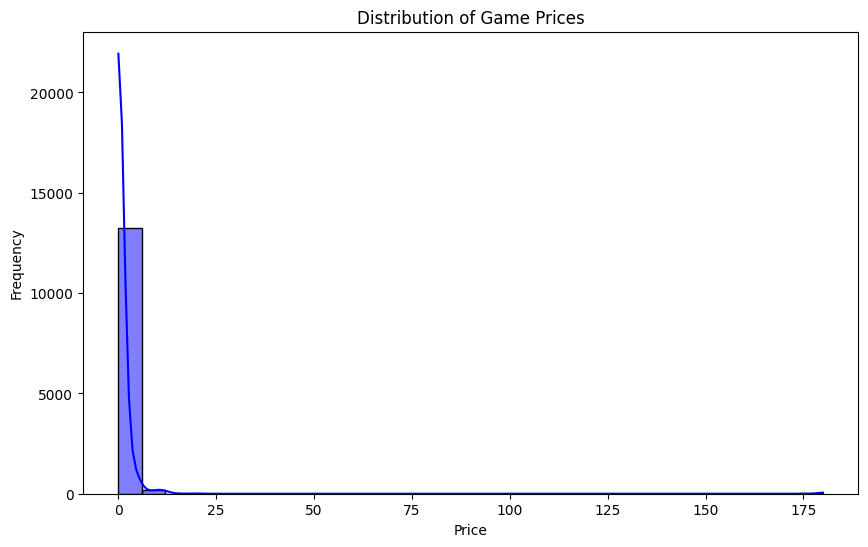

In [28]:
# visualize of price distribution
plt.figure(figsize=(10,6))
sns.histplot(data['Price'], bins=30, kde=True, color='blue')
plt.title('Distribution of Game Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

/tmp/ipykernel_92/1073775595.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age Rating', data=data, palette='viridis')


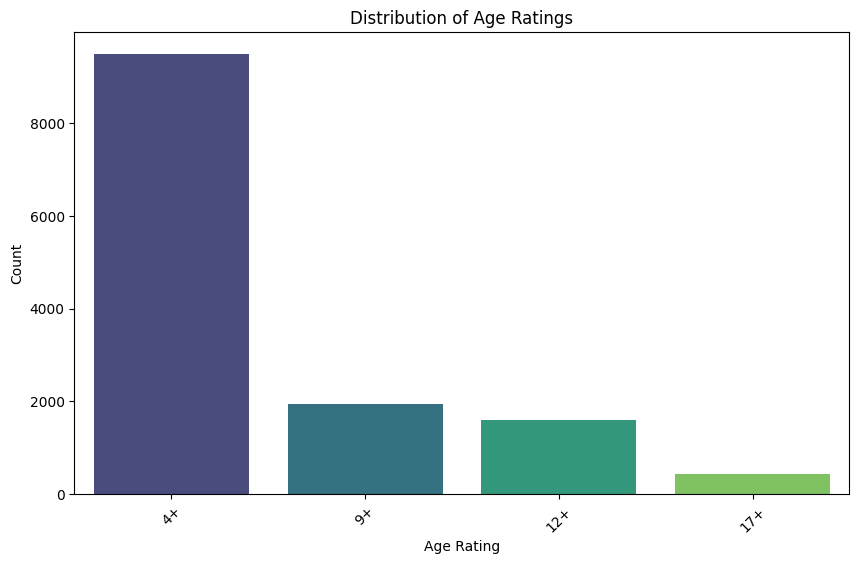

In [22]:
#visualize age rating distribution
plt.figure(figsize=(10,6))
sns.countplot(x='Age Rating', data=data, palette='viridis')
plt.title('Distribution of Age Ratings')
plt.xlabel('Age Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_92/3573550248.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Primary Genre', data=data, palette='viridis')


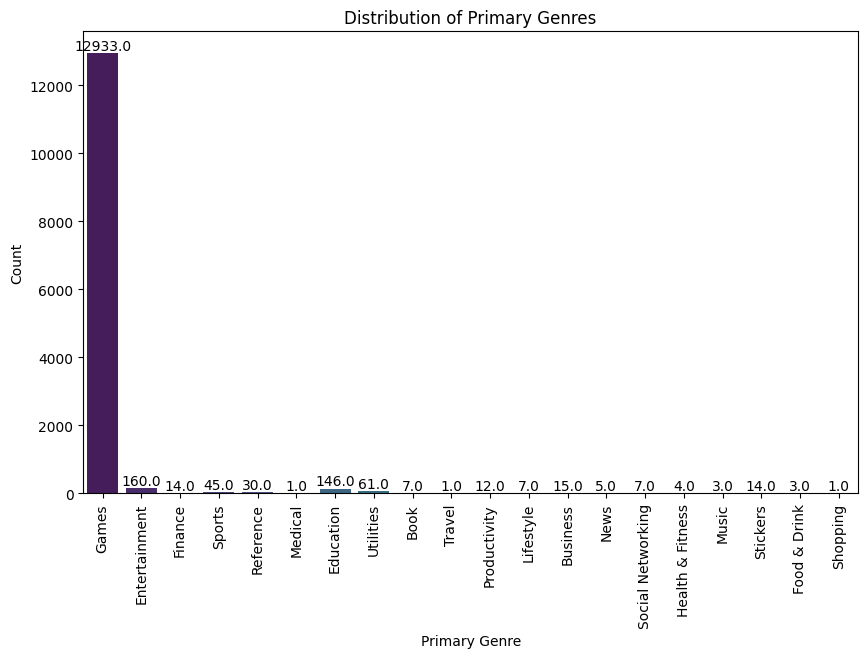

In [27]:
#  visualize Primary Genre distribution and show numbers on top of bars
plt.figure(figsize=(10,6))
ax = sns.countplot(x='Primary Genre', data=data, palette='viridis')
plt.title('Distribution of Primary Genres')
plt.xlabel('Primary Genre')
plt.ylabel('Count')
# Add count labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.xticks(rotation=90)
plt.show()

### Data Cleaning

In [5]:
# Remomoing unnnecessary columns
data.drop(columns=['ID','Unnamed: 18','URL','Icon URL'], inplace=True)
# remove 4 columns that are not useful for analysis.

In [34]:
data.shape[1]

15

In [6]:
#remove duplicates
data.drop_duplicates(inplace=True)
# remove 130 duplicates

In [7]:
data.shape[0]

13469

In [58]:
data.columns

Index(['Name', 'Subtitle', 'Average User Rating', 'User Rating Count', 'Price',
       'In-app Purchases', 'Description', 'Developer', 'Age Rating',
       'Languages', 'Size', 'Primary Genre', 'Genres', 'Original Release Date',
       'Current Version Release Date'],
      dtype='object')

In [36]:
# remove specific columns that has high missing values and not useful for analysis.
data.drop(columns=['Name','Subtitle',  'Description', 'In-app Purchases', 'Description', 'Developer', 'Languages',
                   'Original Release Date',
                   'Current Version Release Date' ], inplace=True)

In [37]:
data.columns

Index(['Average User Rating', 'User Rating Count', 'Price', 'Age Rating',
       'Size', 'Primary Genre', 'Genres'],
      dtype='object')

In [7]:
#  edit size column to be in GB instead of bytes
data['Size'] = data['Size'] / (1024 * 1024 * 1024)  # Convert bytes to GB
data.rename(columns={'Size': 'Size (GB)'}, inplace=True)

In [39]:
data['Size (GB)'].describe()

count    13469.000000
mean         0.096995
std          0.184470
min          0.000048
25%          0.019744
50%          0.045061
75%          0.105083
max          3.730497
Name: Size (GB), dtype: float64

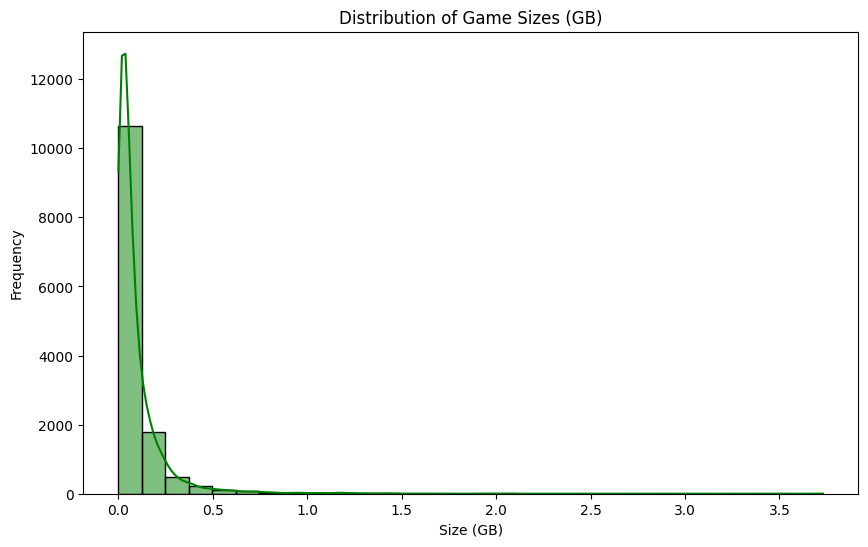

In [36]:
# visualize size (GB) distribution
plt.figure(figsize=(10,6))
sns.histplot(data['Size (GB)'], bins=30, kde=True, color='green')
plt.title('Distribution of Game Sizes (GB)')
plt.xlabel('Size (GB)')
plt.ylabel('Frequency')
plt.show()

In [13]:
data.columns

Index(['Average User Rating', 'Price', 'Age Rating', 'Size (GB)',
       'Primary Genre'],
      dtype='object')

In [8]:
df_labeled   = data[data['Average User Rating'].notna()]
df_unlabeled = data[data['Average User Rating'].isna()]


In [61]:
df_labeled.shape

(6453, 15)

In [62]:
df_labeled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6453 entries, 0 to 13597
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          6453 non-null   object 
 1   Subtitle                      1832 non-null   object 
 2   Average User Rating           6453 non-null   float64
 3   User Rating Count             6453 non-null   float64
 4   Price                         6453 non-null   float64
 5   In-app Purchases              3932 non-null   object 
 6   Description                   6453 non-null   object 
 7   Developer                     6453 non-null   object 
 8   Age Rating                    6453 non-null   object 
 9   Languages                     6437 non-null   object 
 10  Size (GB)                     6453 non-null   float64
 11  Primary Genre                 6453 non-null   object 
 12  Genres                        6453 non-null   object 
 13  Origina

In [65]:
df_labeled['Current Version Release Date'].describe()

count           6453
unique          2147
top       31/07/2019
freq              34
Name: Current Version Release Date, dtype: object

In [70]:
df_labeled.head()

,Name,Subtitle,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size (GB),Primary Genre,Genres,Original Release Date,Current Version Release Date
0,Sudoku,NaN,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",0.014765,Games,"Games, Strategy, Puzzle",11/7/2008,30/05/2017
1,Reversi,NaN,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,0.011482,Games,"Games, Strategy, Board",11/7/2008,17/05/2018
2,Morocco,NaN,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,0.000628,Games,"Games, Board, Strategy",11/7/2008,5/9/2017
3,Sudoku (Free),NaN,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",0.020072,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,Senet Deluxe,NaN,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",0.032307,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [9]:
df_labeled['Original Release Date'] = pd.to_datetime(df_labeled['Original Release Date'],format='mixed')
df_labeled['Current Version Release Date'] = pd.to_datetime(df_labeled['Current Version Release Date'],format='mixed')

today = pd.Timestamp.today()

df_labeled['app_age_days'] = (today - df_labeled['Original Release Date']).dt.days
df_labeled['update_recency_days'] = (today - df_labeled['Current Version Release Date']).dt.days


/tmp/ipykernel_94/2512243567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_labeled['Original Release Date'] = pd.to_datetime(df_labeled['Original Release Date'],format='mixed')
/tmp/ipykernel_94/2512243567.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_labeled['Current Version Release Date'] = pd.to_datetime(df_labeled['Current Version Release Date'],format='mixed')
/tmp/ipykernel_94/2512243567.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [74]:
df_labeled.head()

,Name,Subtitle,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size (GB),Primary Genre,Genres,Original Release Date,Current Version Release Date,app_age_days,update_recency_days
0,Sudoku,NaN,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",0.014765,Games,"Games, Strategy, Puzzle",2008-11-07,2017-05-30,6306,3180
1,Reversi,NaN,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,0.011482,Games,"Games, Strategy, Board",2008-11-07,2018-05-17,6306,2828
2,Morocco,NaN,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,0.000628,Games,"Games, Board, Strategy",2008-11-07,2017-05-09,6306,3201
3,Sudoku (Free),NaN,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",0.020072,Games,"Games, Strategy, Puzzle",2008-07-23,2017-05-30,6413,3180
4,Senet Deluxe,NaN,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",0.032307,Games,"Games, Strategy, Board, Education",2008-07-18,2018-07-22,6418,2762


In [10]:
df_labeled['is_free'] = (df_labeled['Price'] == 0).astype(int)
df_labeled['log_price'] = np.log1p(df_labeled['Price'])


/tmp/ipykernel_94/1783611355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_labeled['is_free'] = (df_labeled['Price'] == 0).astype(int)
/tmp/ipykernel_94/1783611355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_labeled['log_price'] = np.log1p(df_labeled['Price'])


In [11]:
df_labeled['log_rating_count'] = np.log1p(df_labeled['User Rating Count'])


/tmp/ipykernel_94/960791283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_labeled['log_rating_count'] = np.log1p(df_labeled['User Rating Count'])


In [12]:
df_labeled['log_size'] = np.log1p(df_labeled['Size (GB)'])

/tmp/ipykernel_94/3462677257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_labeled['log_size'] = np.log1p(df_labeled['Size (GB)'])


In [13]:
df_labeled['num_languages'] = df_labeled['Languages'].apply(lambda x: len(str(x).split(',')))

/tmp/ipykernel_94/465302125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_labeled['num_languages'] = df_labeled['Languages'].apply(lambda x: len(str(x).split(',')))


In [14]:
df_labeled['has_iap'] = df_labeled['In-app Purchases'].notna().astype(int)


/tmp/ipykernel_94/2980158842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_labeled['has_iap'] = df_labeled['In-app Purchases'].notna().astype(int)


In [15]:
df_labeled['has_subtitle'] = df_labeled['Subtitle'].notna().astype(int)


/tmp/ipykernel_94/330589446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_labeled['has_subtitle'] = df_labeled['Subtitle'].notna().astype(int)


In [87]:
df_labeled.head()

,Name,Subtitle,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,...,Current Version Release Date,app_age_days,update_recency_days,is_free,log_price,log_rating_count,log_size,num_languages,has_iap,has_subtitle
0,Sudoku,NaN,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",...,2017-05-30,6306,3180,0,1.383791,8.175829,0.014657,17,0,0
1,Reversi,NaN,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,...,2018-05-17,6306,2828,0,1.095273,5.652489,0.011417,1,0,0
2,Morocco,NaN,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,...,2017-05-09,6306,3201,1,0.000000,9.033245,0.000628,1,0,0
3,Sudoku (Free),NaN,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",...,2017-05-30,6413,3180,1,0.000000,12.156856,0.019873,17,0,0
4,Senet Deluxe,NaN,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",...,2018-07-22,6418,2762,0,1.383791,3.367296,0.031796,15,0,0


In [83]:
df_labeled.shape

(6453, 24)

### Data Preprocessing

In [ ]:
def define_pipeline(df_labeled):
    from sklearn.pipeline import Pipeline
    from sklearn.compose import ColumnTransformer
    from sklearn.preprocessing import OneHotEncoder, StandardScaler
    from xgboost import XGBRegressor
    
    # Define features and target variable
    X = df_labeled.drop(columns=['Average User Rating'])
    y = df_labeled['Average User Rating']
    
    # Identify numerical and categorical columns
    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = X.select_dtypes(include=['object']).columns
    
    # Preprocessing for numerical data
    numerical_transformer = StandardScaler()
    
    # Preprocessing for categorical data
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')
    
    # Combine preprocessing steps
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])
    
    # Define the model
    xgb_model = XGBRegressor(random_state=42)
    
    # Create the pipeline
    xg_pipe = Pipeline([
        ('preprocess', preprocessor),
        ('model', xgb_model)
    ])
    
    return xg_pipe, X, y


In [16]:
target = 'Average User Rating'

numeric_features = [
    'log_price',
    'log_rating_count',
    'log_size',
    'app_age_days',
    'update_recency_days',
    'num_languages'
]

categorical_features = [
    'Primary Genre',
    'Age Rating'
]

X = df_labeled[numeric_features + categorical_features]
y = df_labeled[target]


In [51]:
#split data into features and target
X = df_labeled.drop(columns=['Average User Rating'])
y = df_labeled['Average User Rating']

In [17]:
# split to train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)


In [53]:
# one hot encoding for "Age Rating" and "Primary Genre"
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
X_train_encoded = encoder.fit_transform(X_train[['Age Rating', 'Primary Genre']])
X_test_encoded = encoder.transform(X_test[['Age Rating', 'Primary Genre']])


In [54]:
# label encoding for "Genres" column
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X_train['Genres'] = label_encoder.fit_transform(X_train['Genres'])
X_test['Genres'] = label_encoder.transform(X_test['Genres'])

ValueError: y contains previously unseen labels: 'Games, Strategy, Utilities, Board'

In [49]:
# normalize numerical features
numerical_features = ['Size (GB)', 'Price']
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

### Machine Learning

#### Linear Regression

In [21]:
#linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_encoded, y_train)


LinearRegression()

#### Evaluation metrics

In [22]:
#evaluate model 
y_pred = model.predict(X_test_encoded)

# evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [23]:
#display evaluation results
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 0.58
R-squared: 0.01


#### Polynomial regression

In [24]:
# polynomial regression
from sklearn.preprocessing import PolynomialFeatures


poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train_encoded)
X_test_poly = poly.transform(X_test_encoded)
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

LinearRegression()

In [25]:
y_pred_poly = model_poly.predict(X_test_poly)

#### Evaluation metrics

In [26]:
poly_mse = mean_squared_error(y_test, y_pred_poly)
poly_r2 = r2_score(y_test, y_pred_poly)

In [27]:
print(f'Polynomial Regression Mean Squared Error: {poly_mse:.2f}')
print(f'Polynomial Regression R-squared: {poly_r2:.2f}')

Polynomial Regression Mean Squared Error: 0.58
Polynomial Regression R-squared: 0.01


#### Random forest

In [19]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=300,
    random_state=42
)
model

RandomForestRegressor(n_estimators=300, random_state=42)

In [20]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('preprocess', preprocessor),
    ('model', model)
])


In [21]:
pipe.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['log_price',
                                                   'log_rating_count',
                                                   'log_size', 'app_age_days',
                                                   'update_recency_days',
                                                   'num_languages']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Primary Genre',
                                                   'Age Rating'])])),
                ('model',
                 RandomForestRegressor(n_estimators=300, random_state=42))])

In [23]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

y_pred = pipe.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)
# mse
print("MSE:", mse)

RMSE: 0.700142698130226
MAE: 0.521709269300284
R2: 0.15651069905740034
MSE: 0.4901997977450727


#### XG BOOSt

In [24]:
# XGBoost Regressor
from xgboost import XGBRegressor
xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)


In [25]:
xg_pipe = Pipeline([
    ('preprocess', preprocessor),
    ('model', xgb_model)
])

In [27]:
xg_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['log_price',
                                                   'log_rating_count',
                                                   'log_size', 'app_age_days',
                                                   'update_recency_days',
                                                   'num_languages']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Primary Genre',
                                                   'Age Rating'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=Non...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=300, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [28]:
xg_pred = xg_pipe.predict(X_test)

xg_mse = mean_squared_error(y_test, xg_pred)
xg_rmse = np.sqrt(xg_mse)
print("XGBoost RMSE:", xg_rmse)
print("XGBoost MSE:", xg_mse)
xg_mae = mean_absolute_error(y_test, xg_pred)
xg_r2 = r2_score(y_test, xg_pred)
print("XGBoost MAE:", xg_mae)
print("XGBoost R2:", xg_r2)

XGBoost RMSE: 0.7154845266733543
XGBoost MSE: 0.5119181079089937
XGBoost MAE: 0.5293269177724187
XGBoost R2: 0.11913989159870952
